In [98]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [53]:
df= pd.read_csv(r'C:\Users\HP\Downloads\Unemployment in India.csv')
df

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [55]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [56]:
df= df.dropna()

In [57]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

### Exploring the data

In [58]:
df['Region'].nunique()

28

##### The dataset contains 28 unique regions

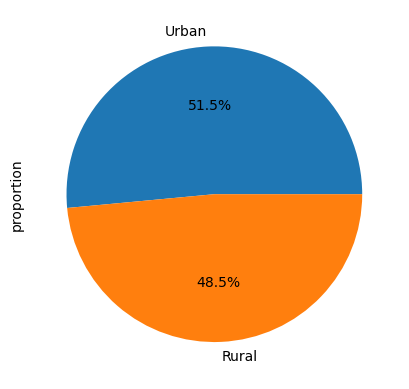

In [59]:
df["Area"].value_counts(normalize=True).plot(kind="pie",autopct='%1.1f%%')
plt.show()

####  The whole dataset contains 51% Urban region while there are 48.5%  of rural regions

C:\Users\HP\AppData\Local\Temp\ipykernel_20296\960844498.py:3: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\HP\AppData\Local\Temp\ipykernel_20296\960844498.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



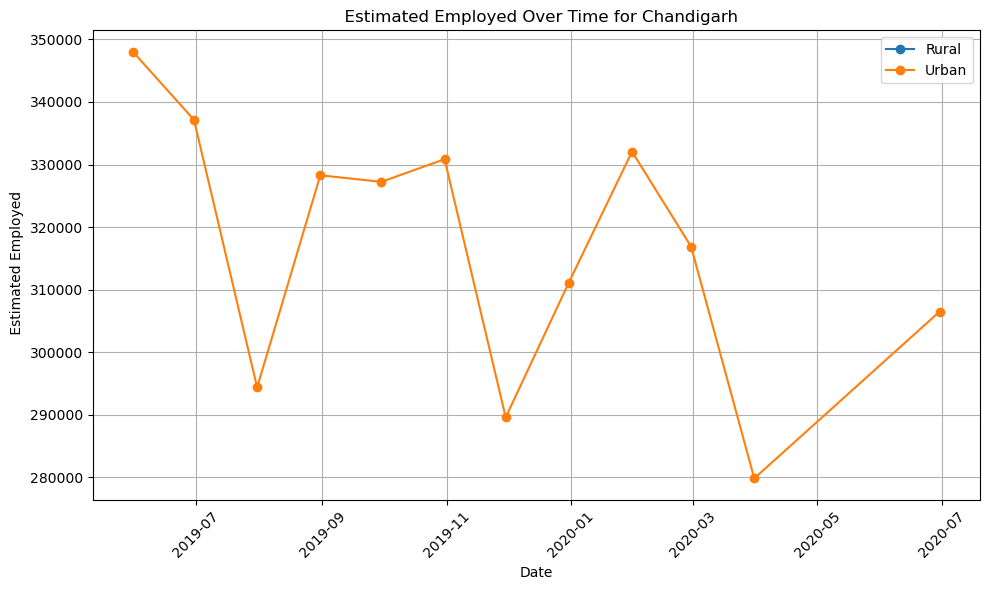

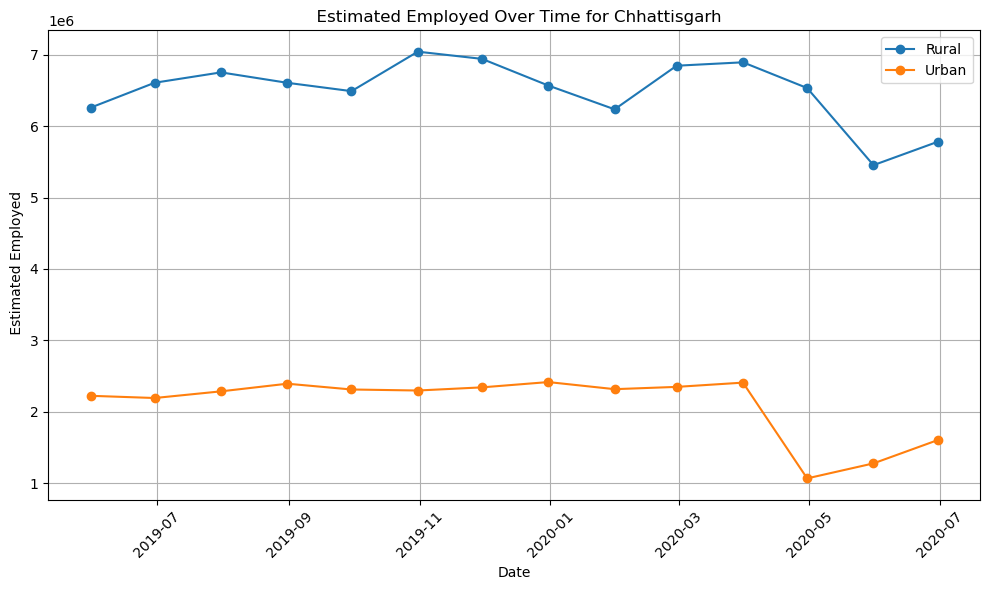

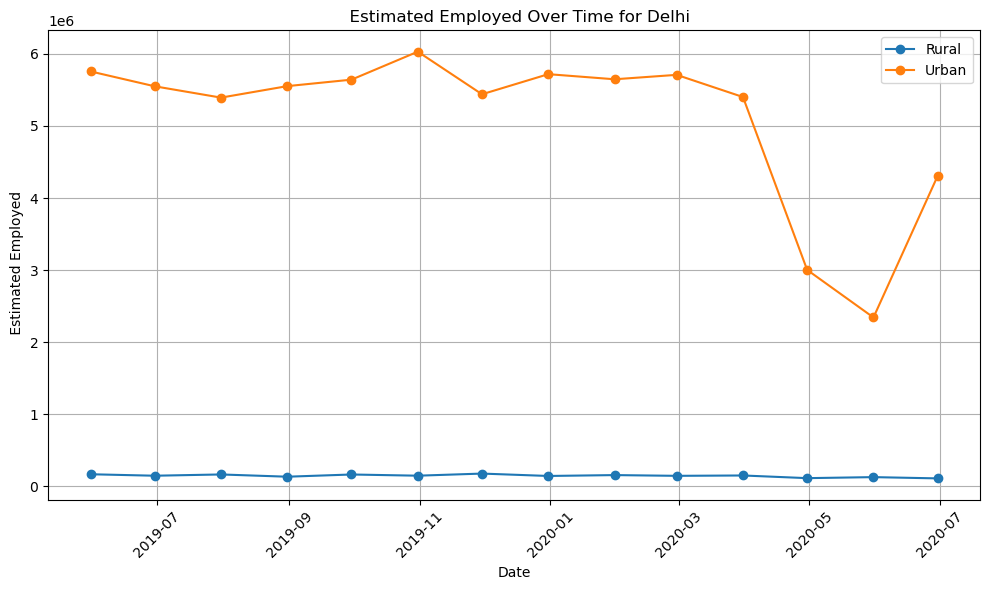

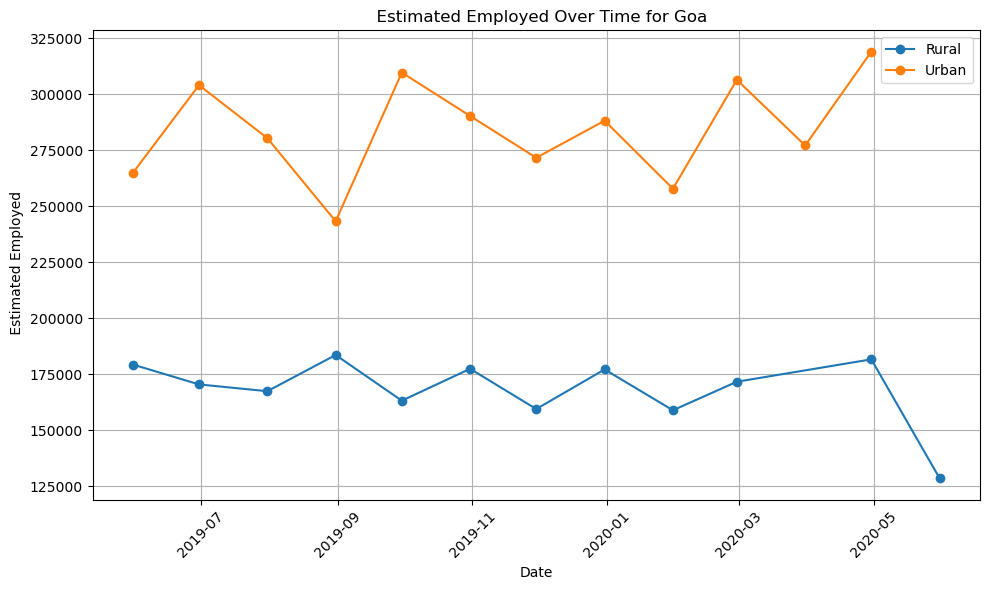

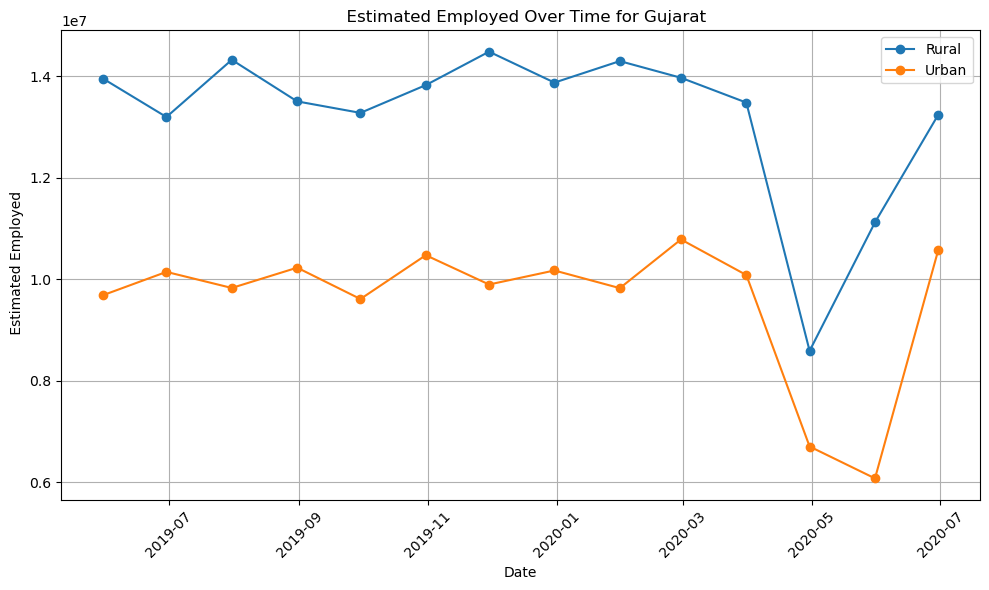

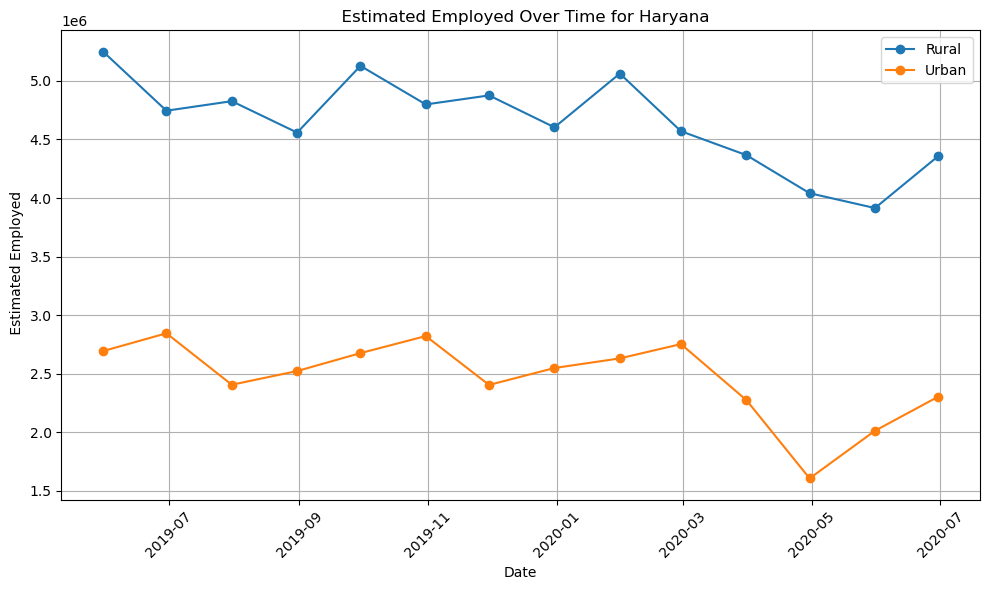

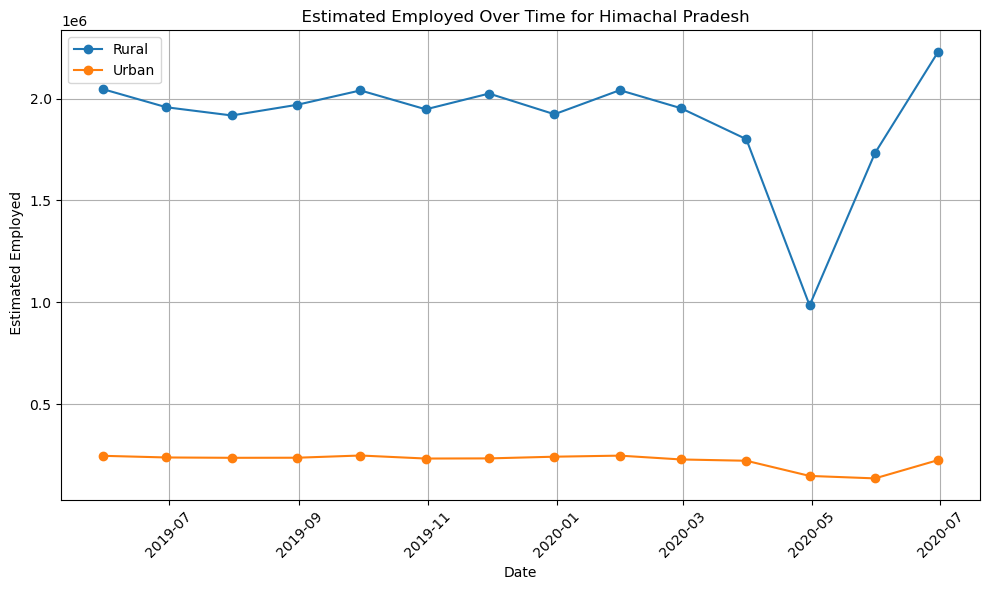

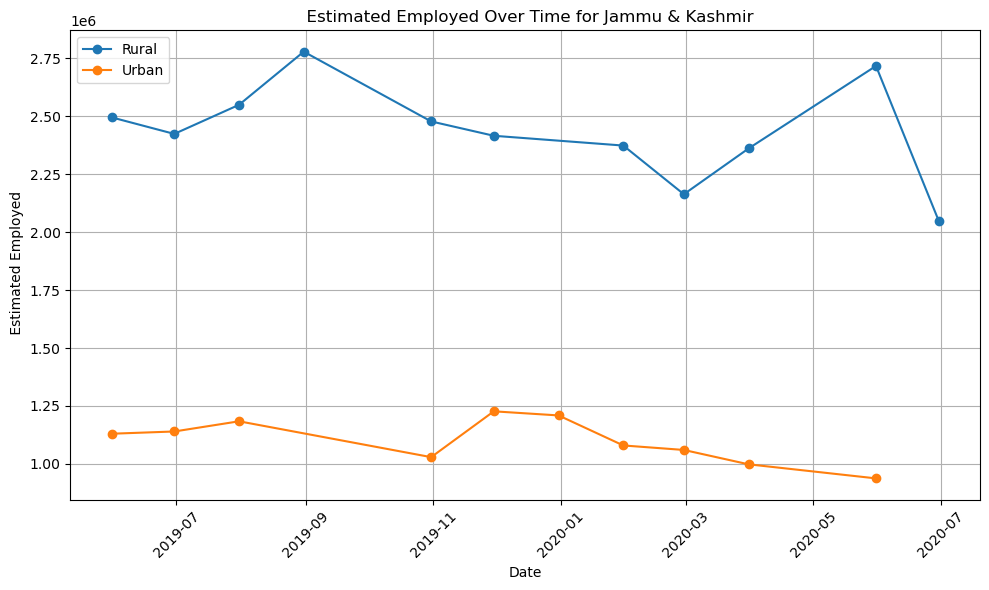

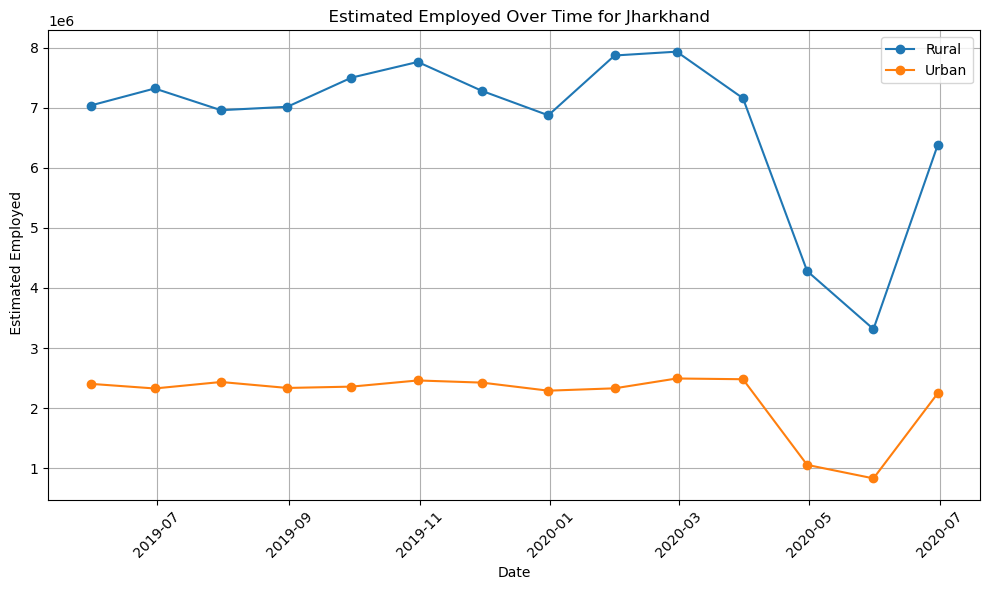

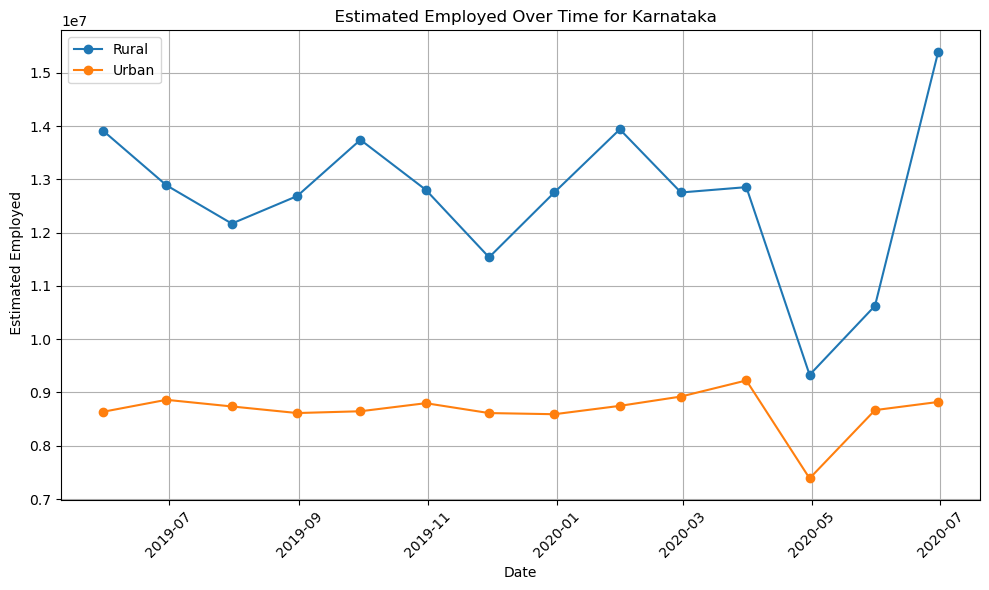

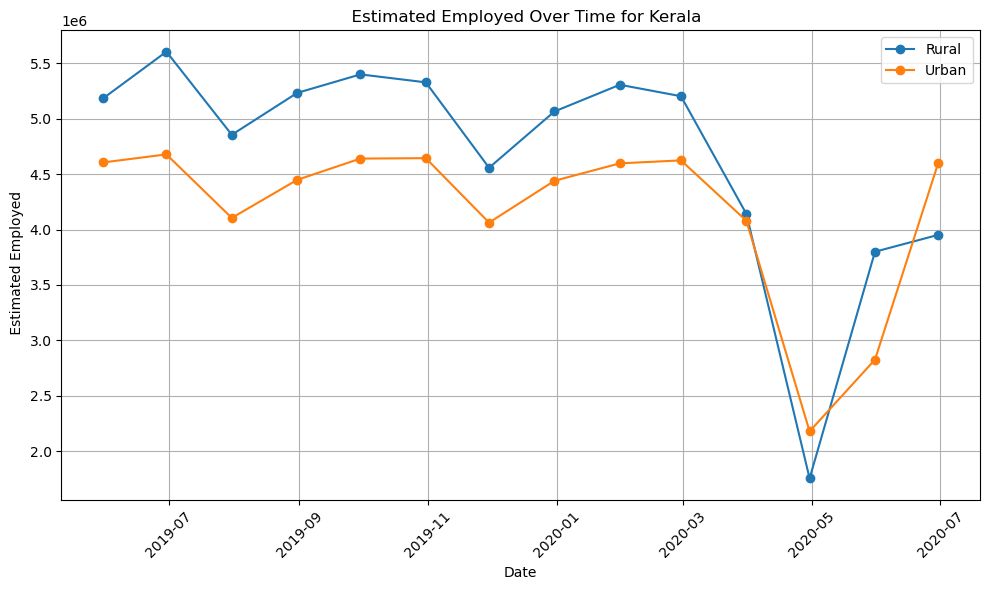

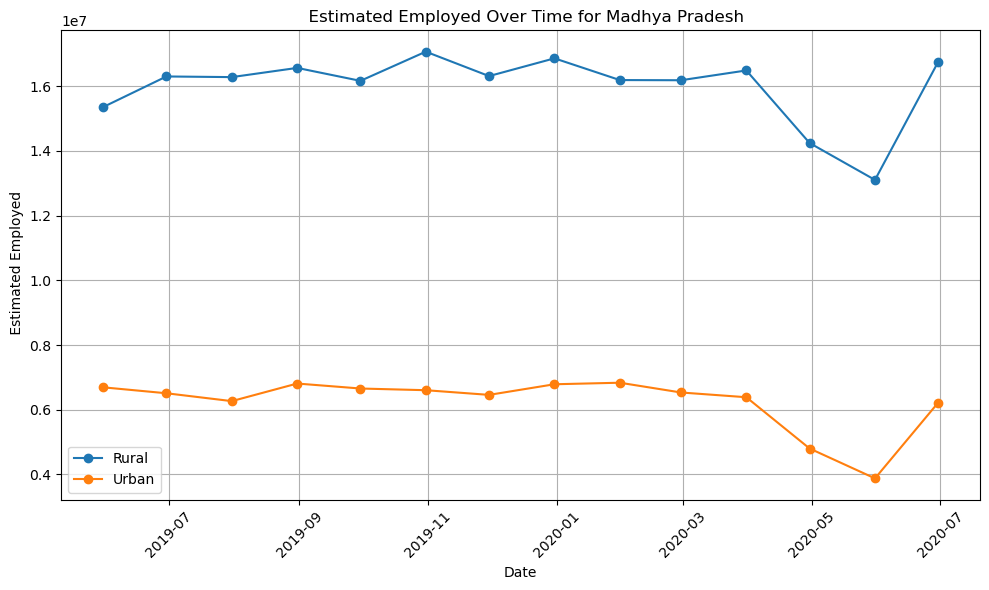

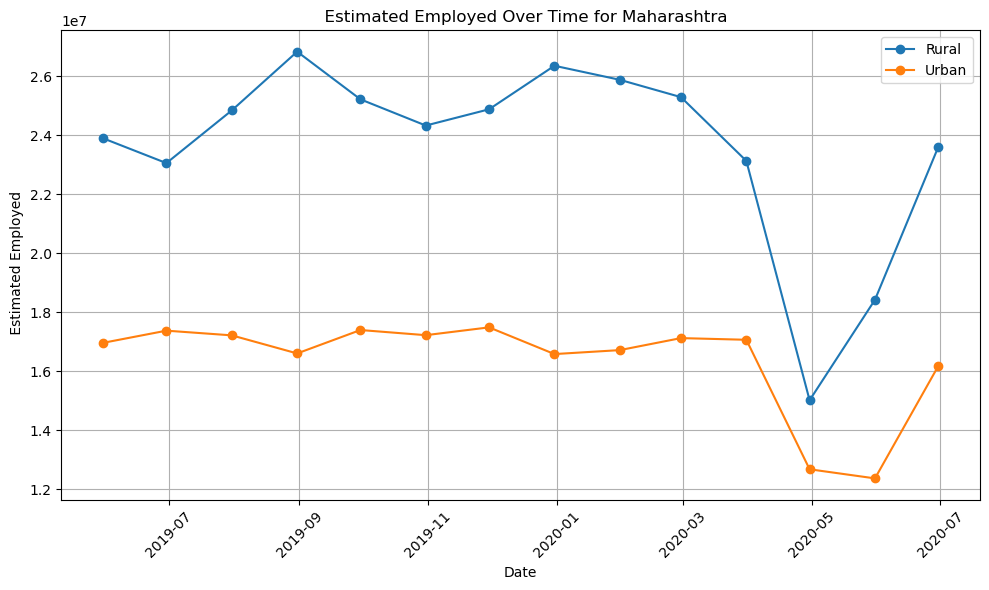

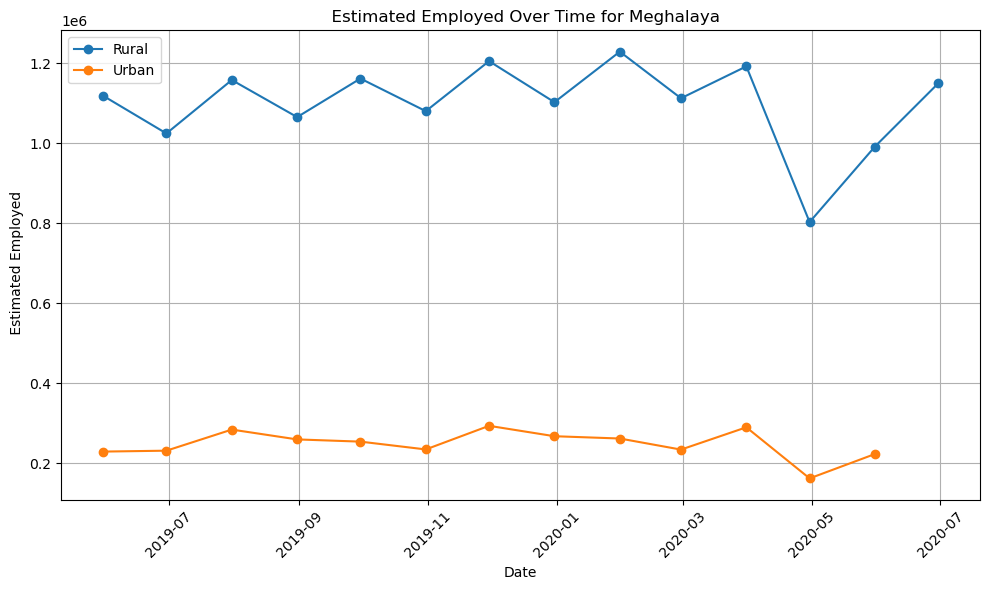

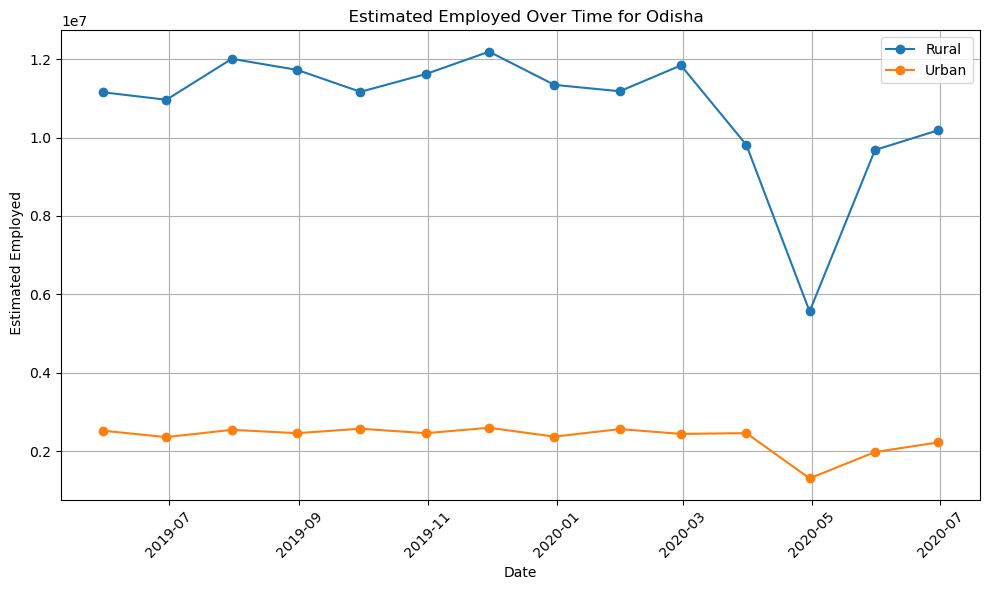

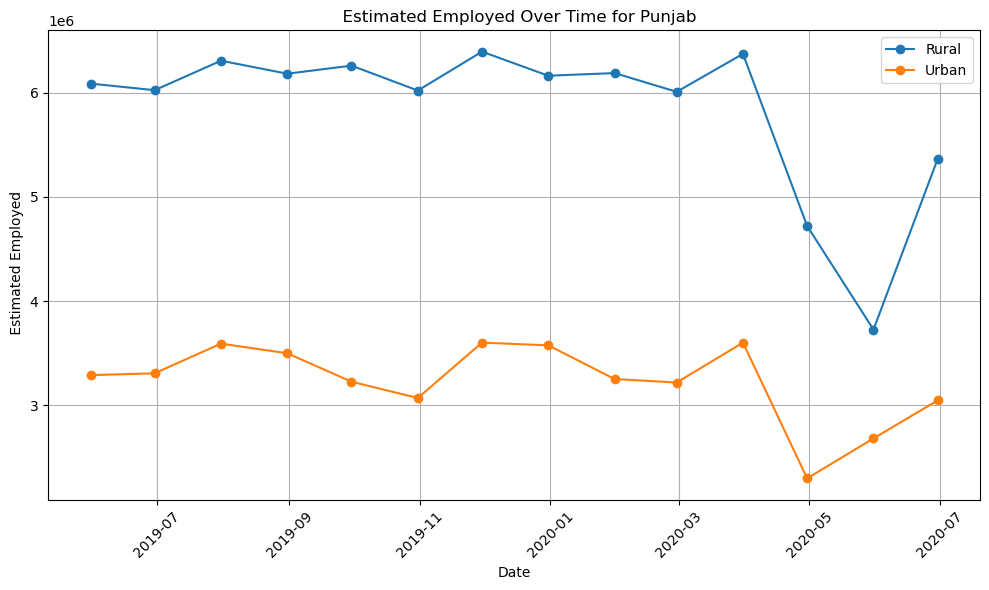

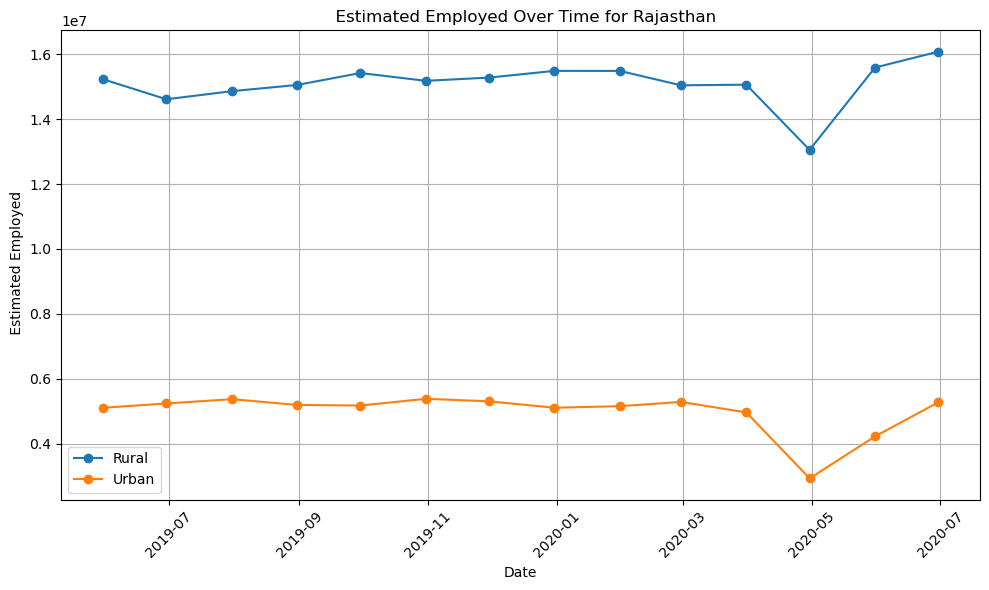

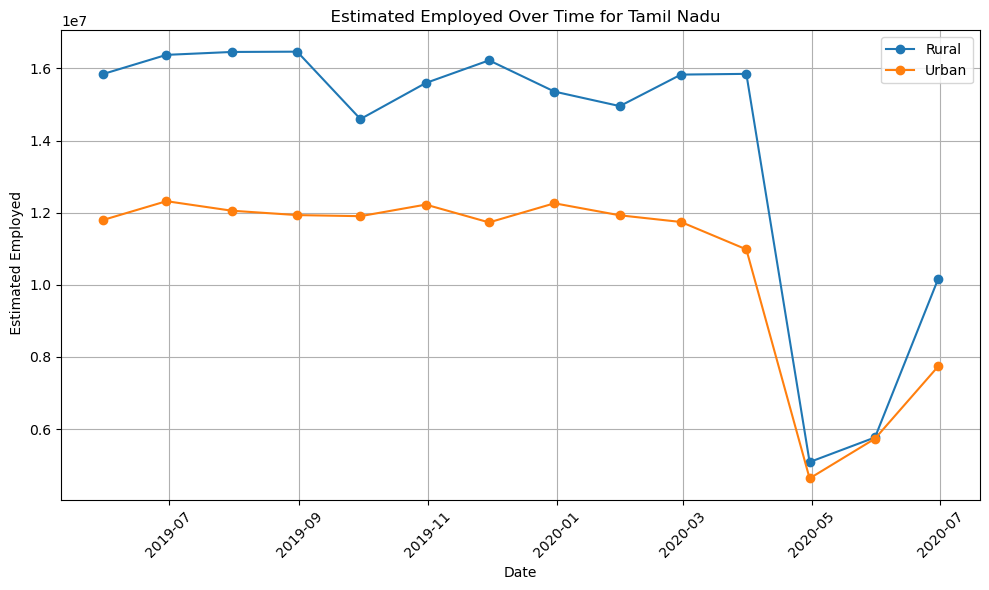

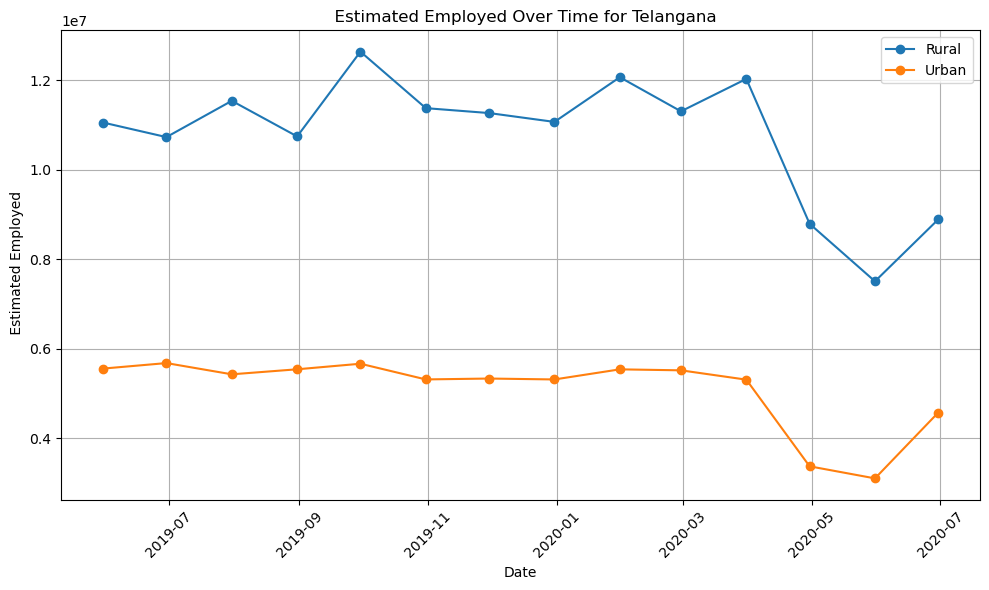

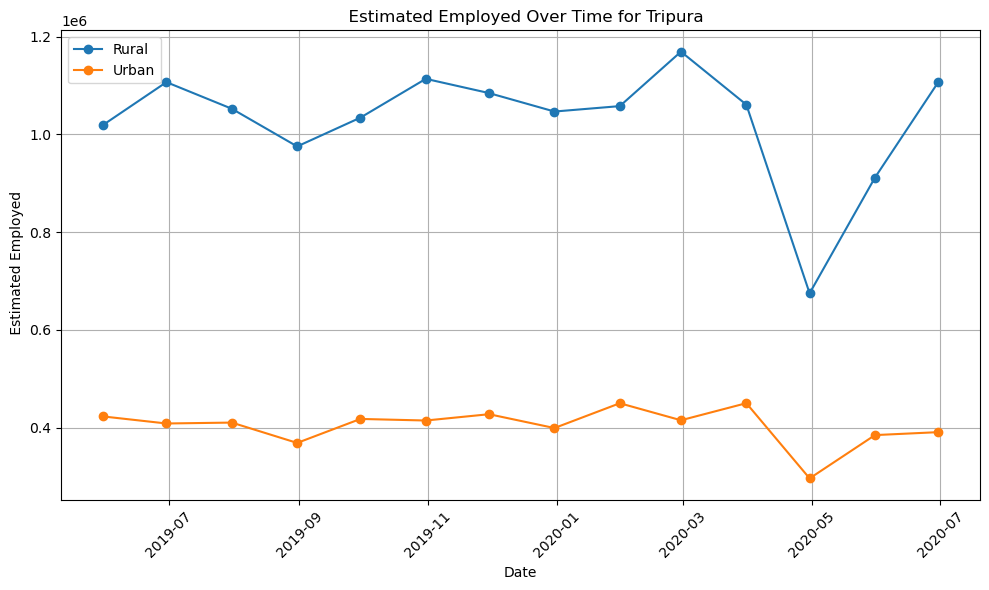

C:\Users\HP\AppData\Local\Temp\ipykernel_20296\960844498.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



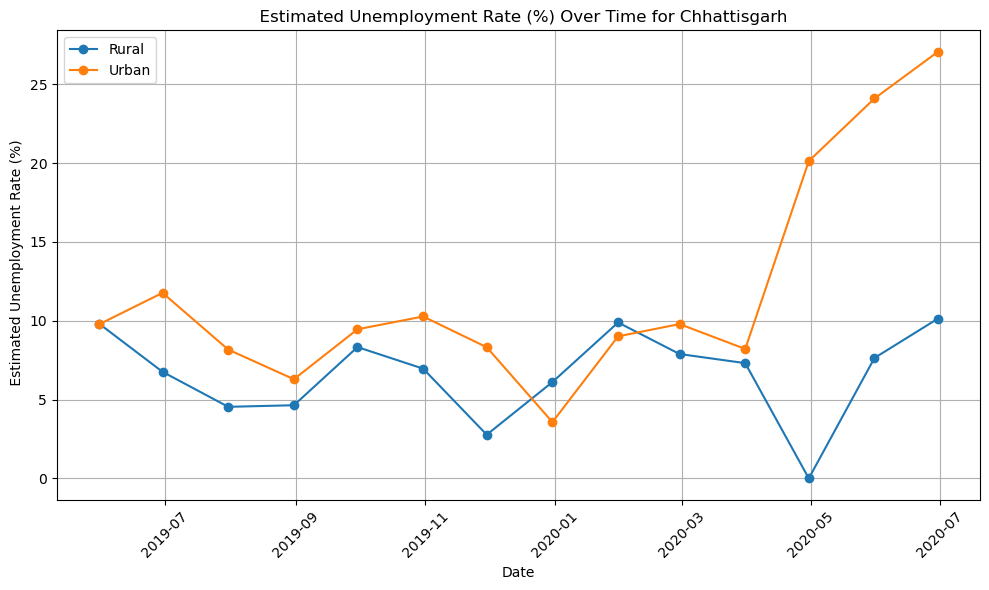

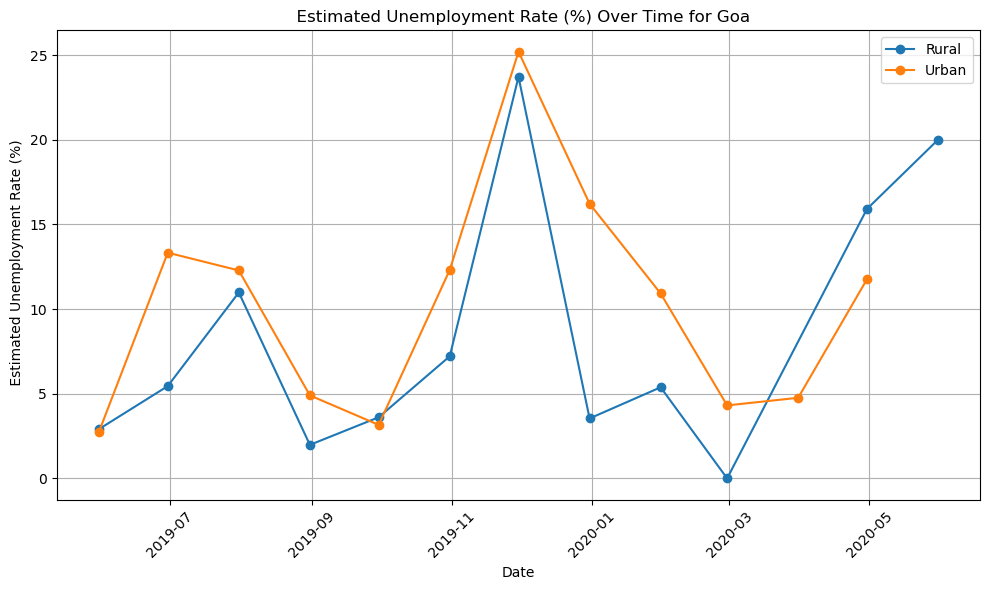

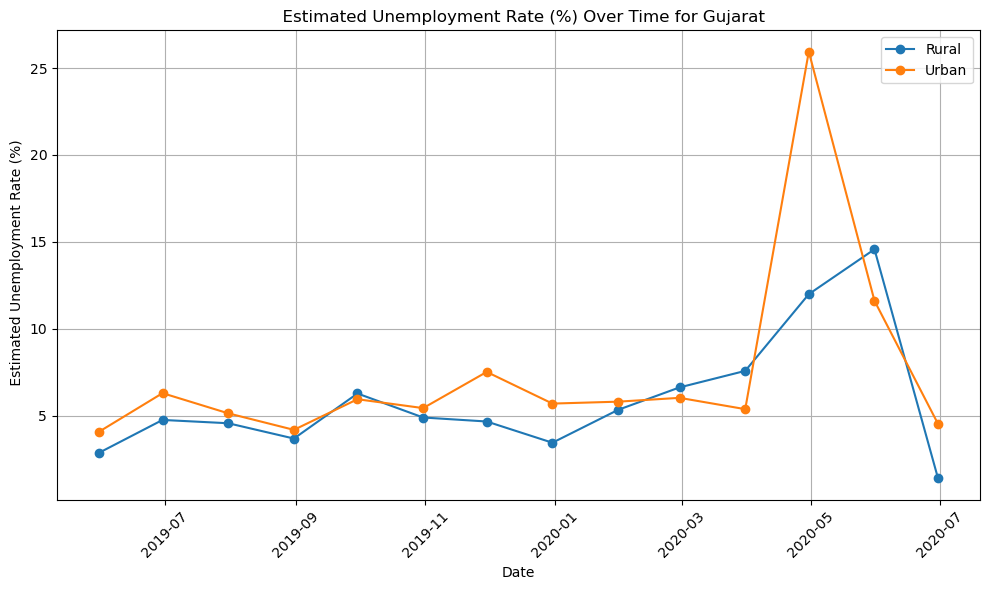

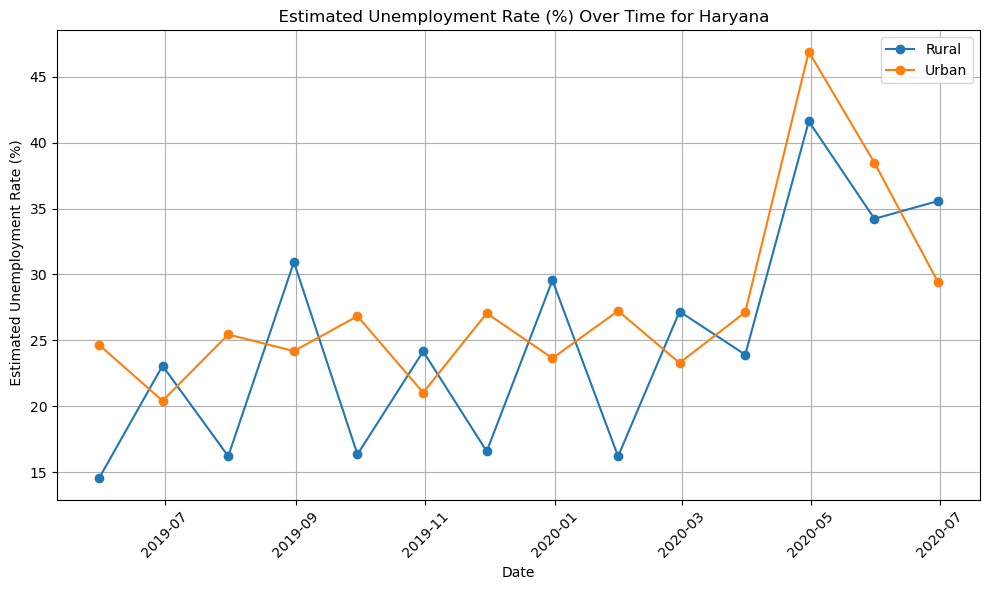

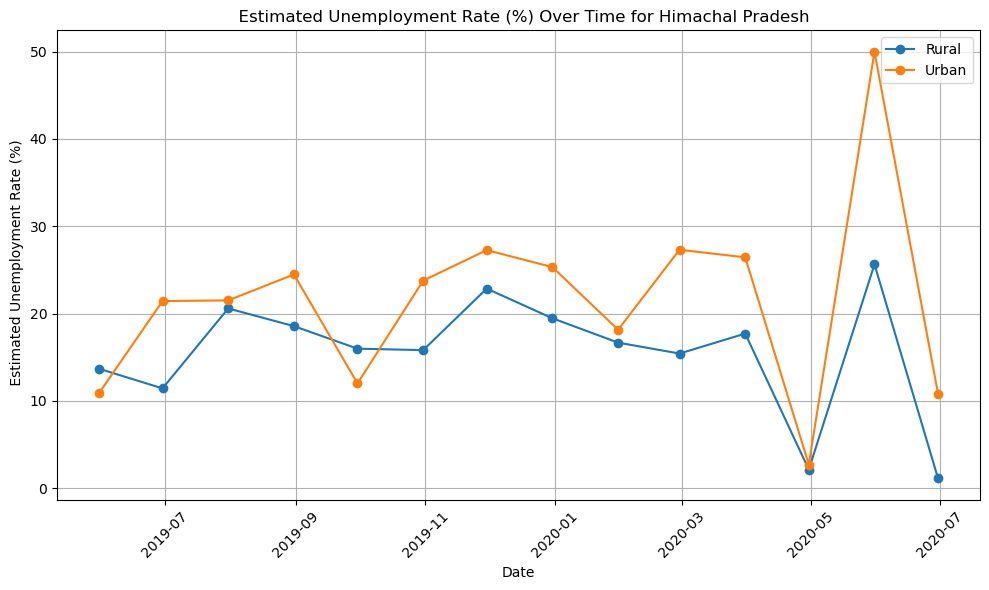

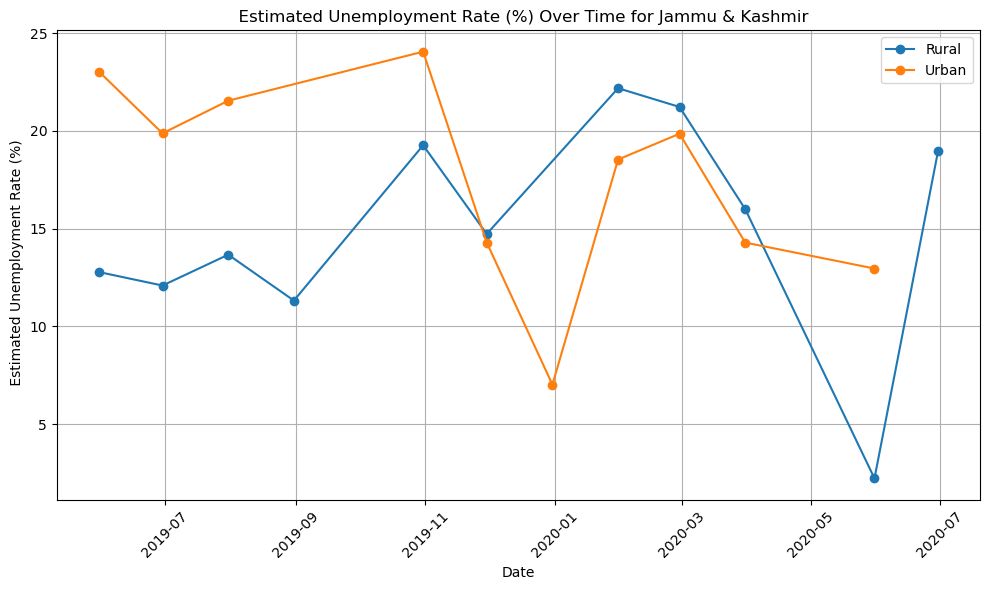

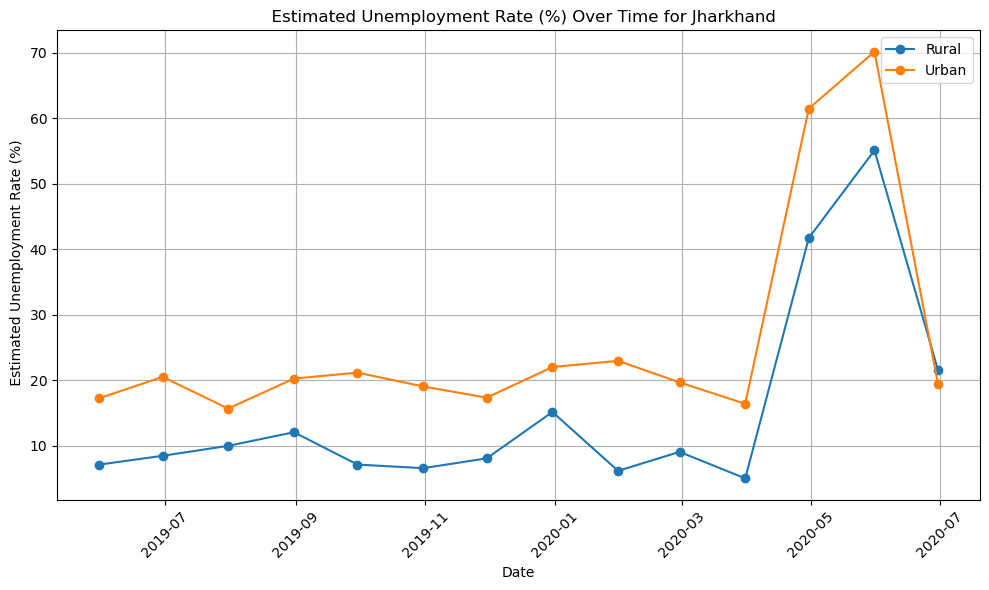

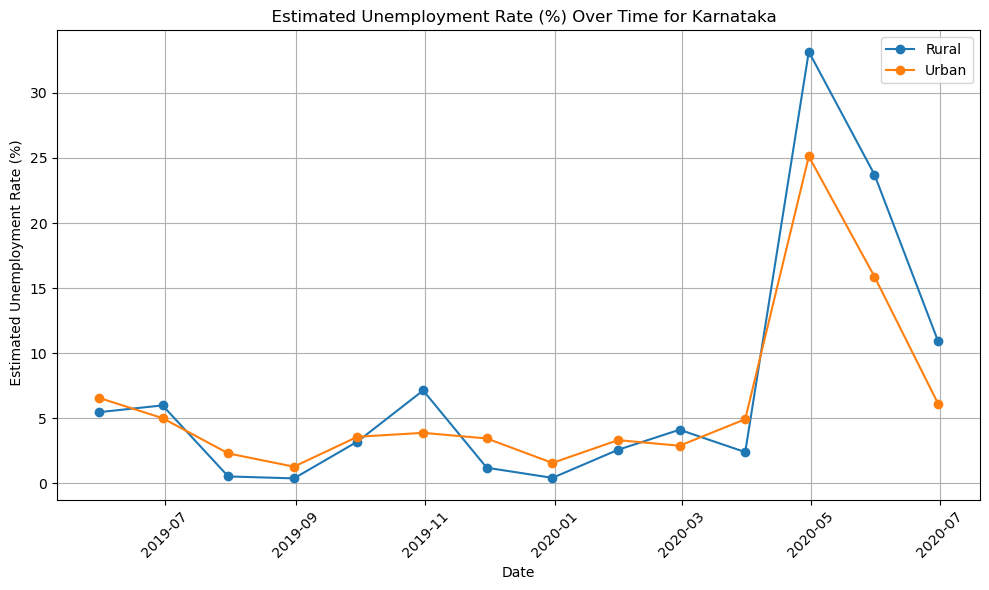

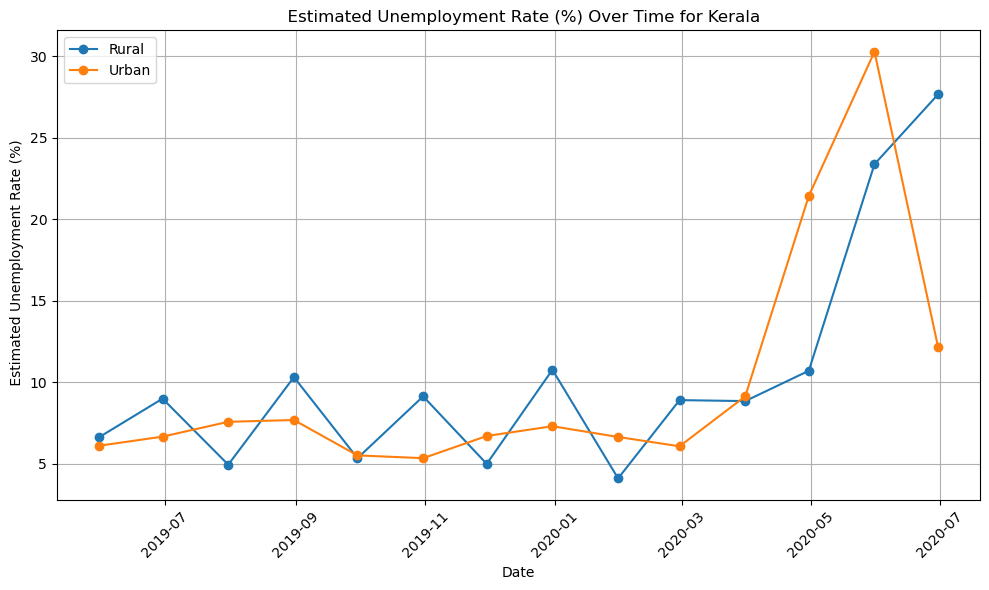

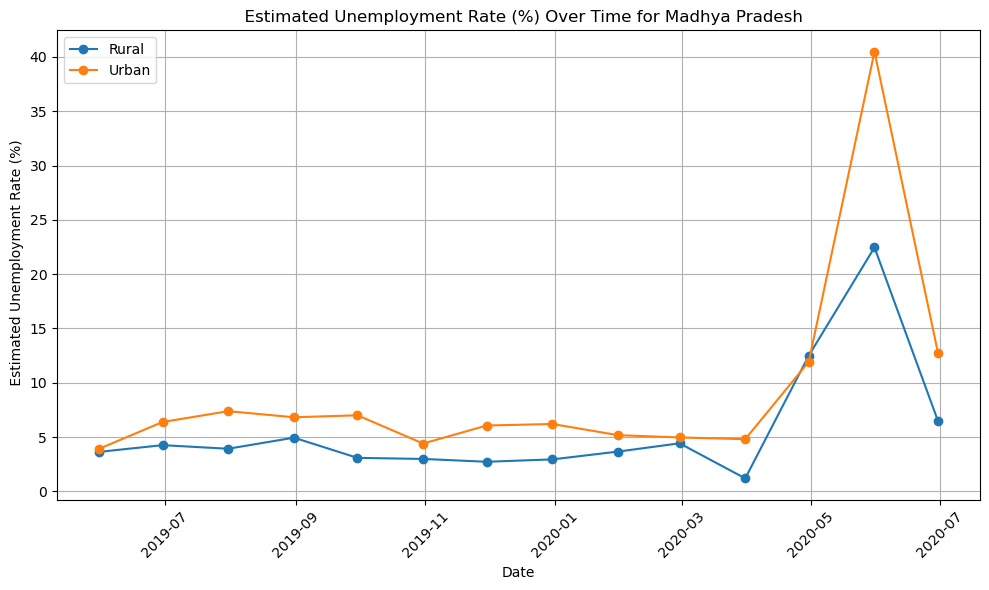

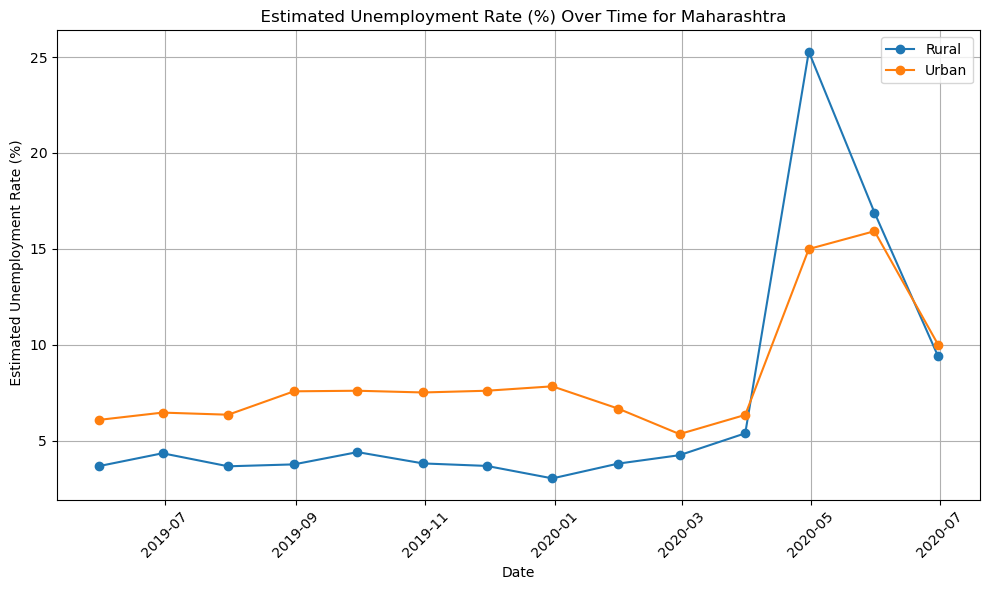

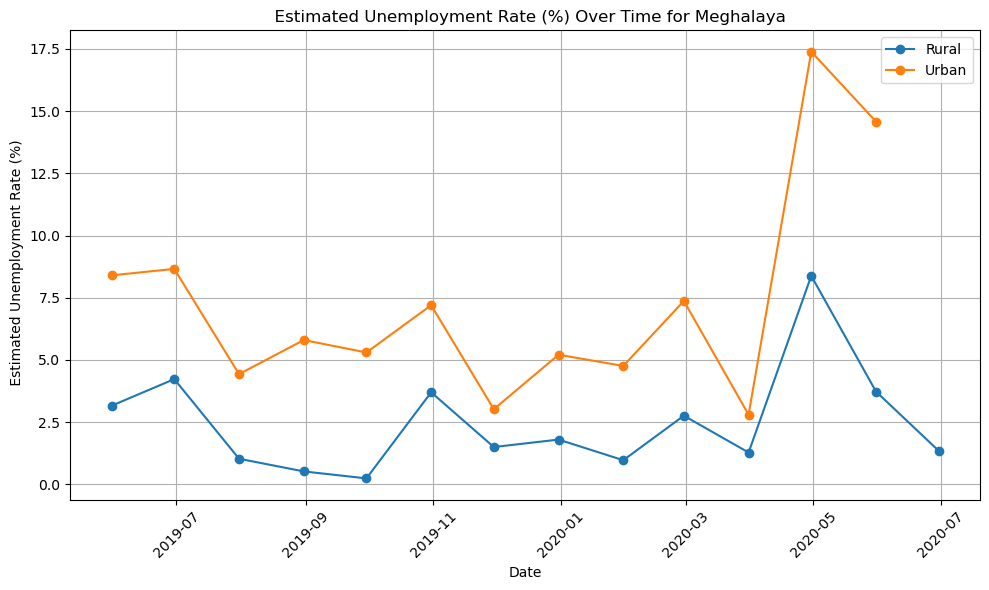

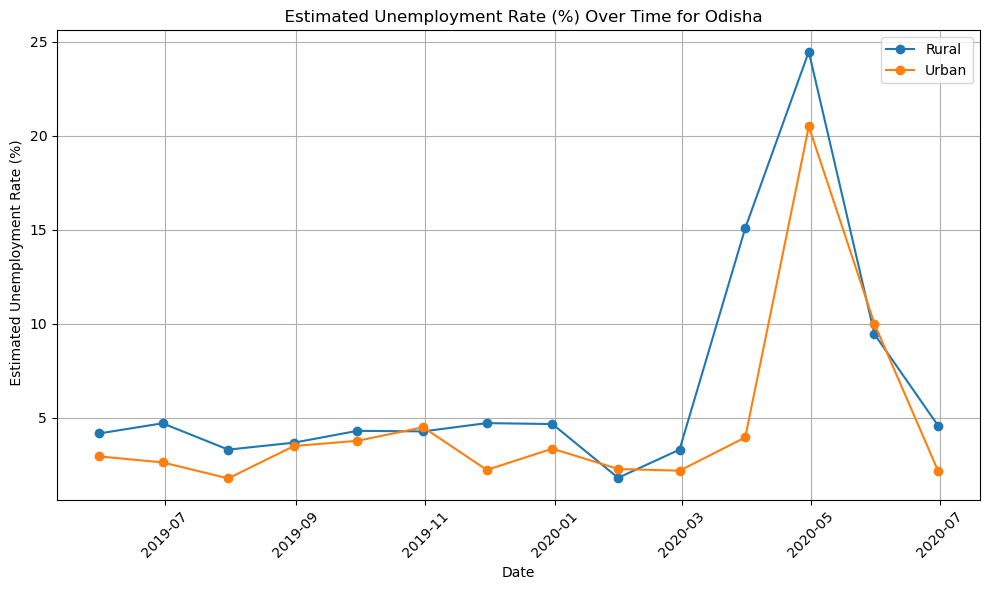

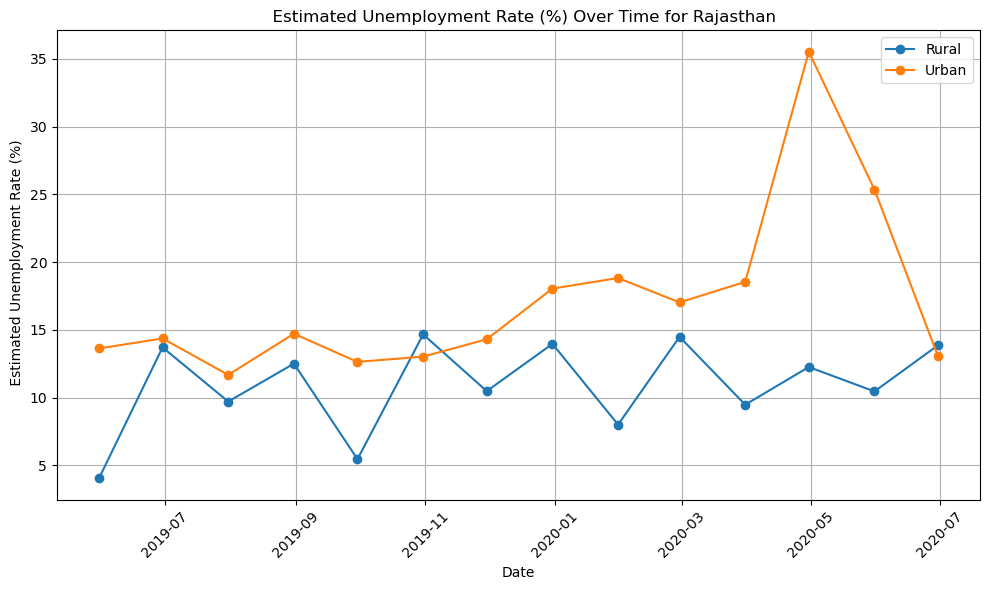

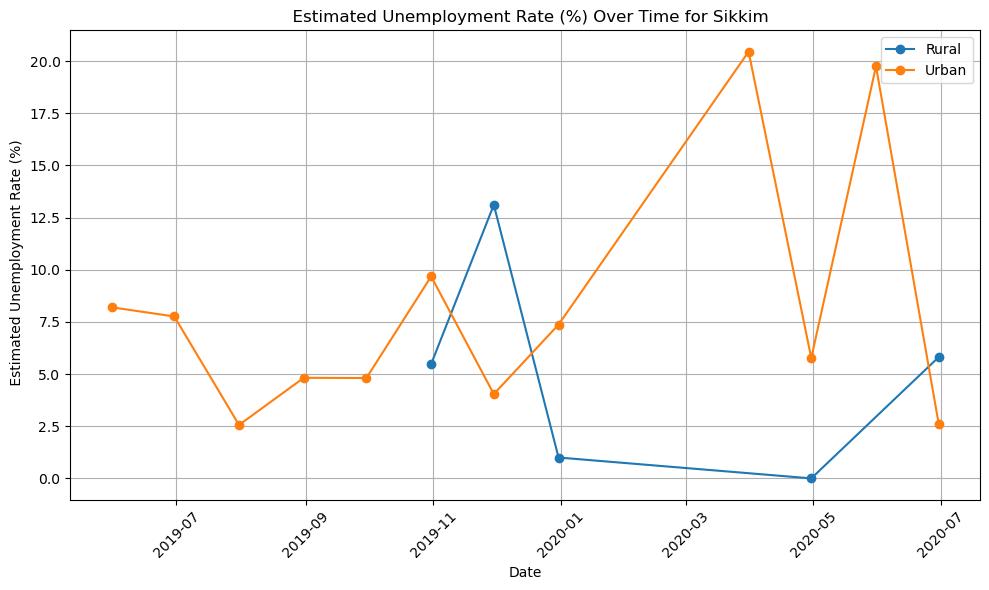

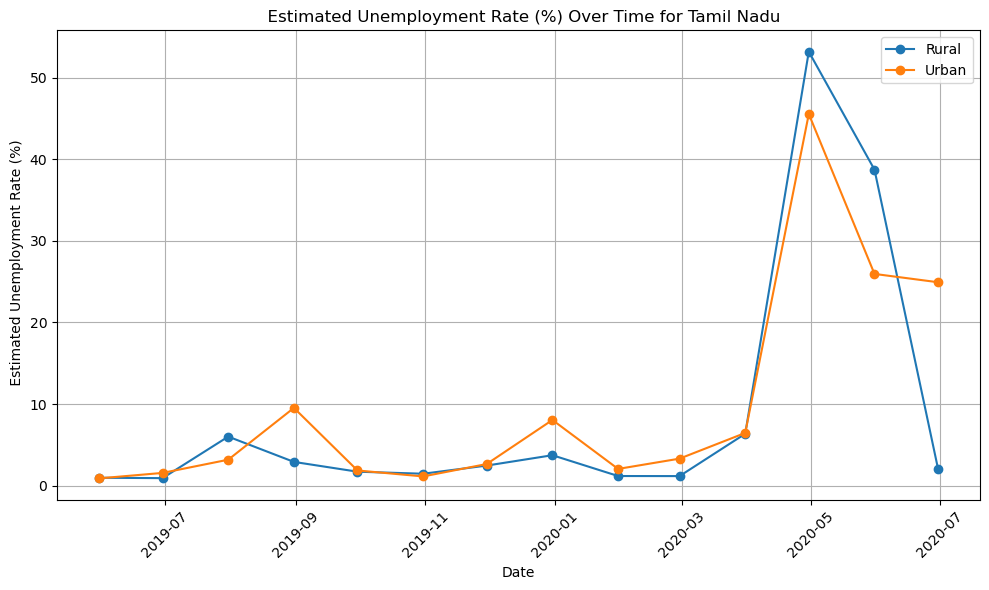

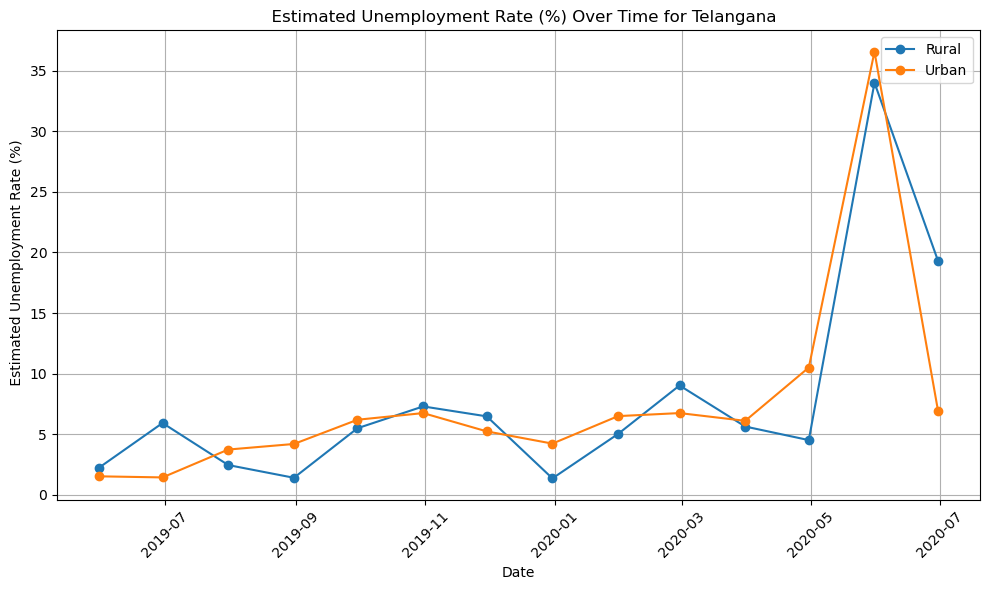

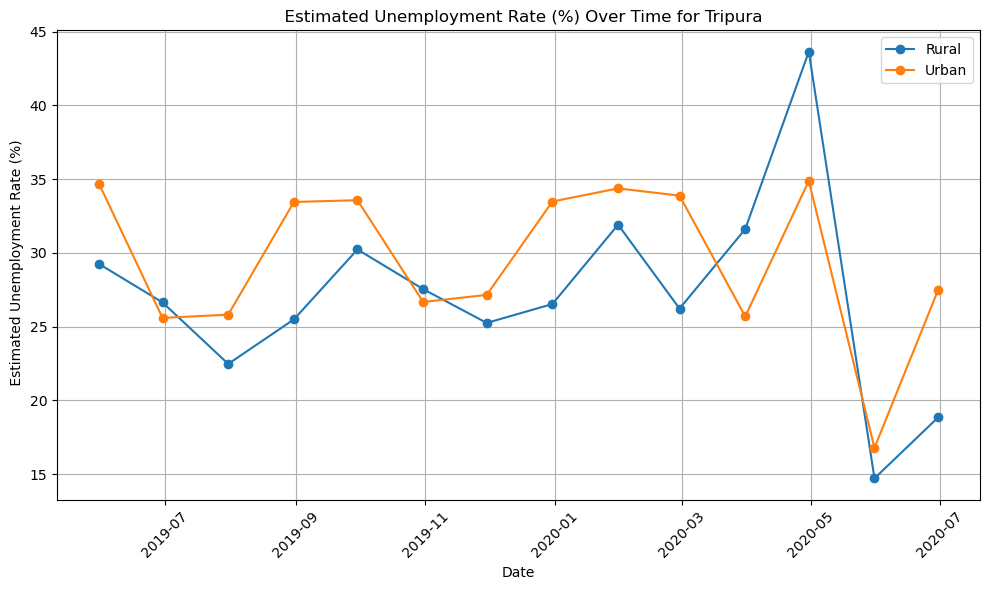

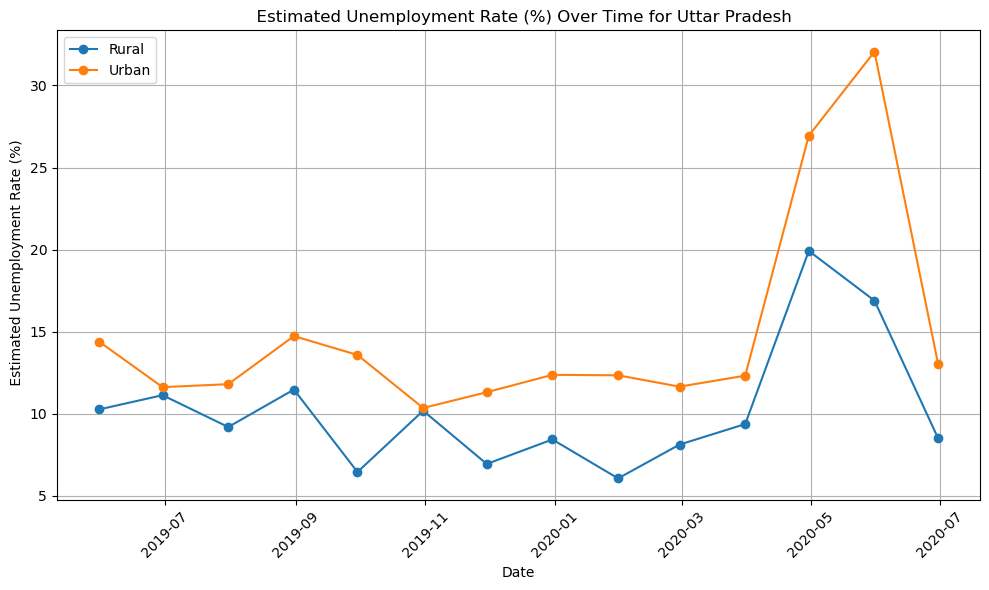

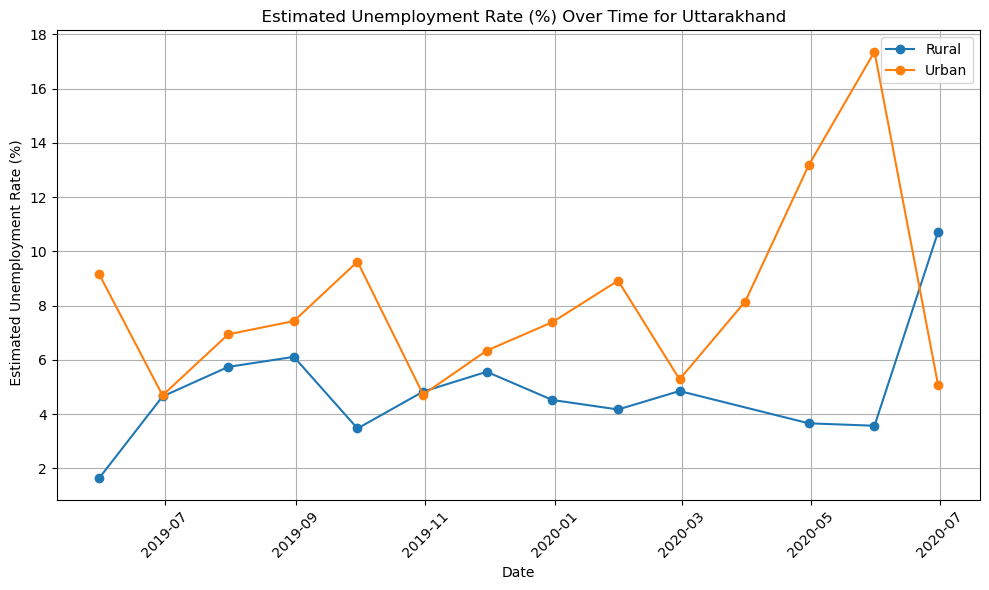

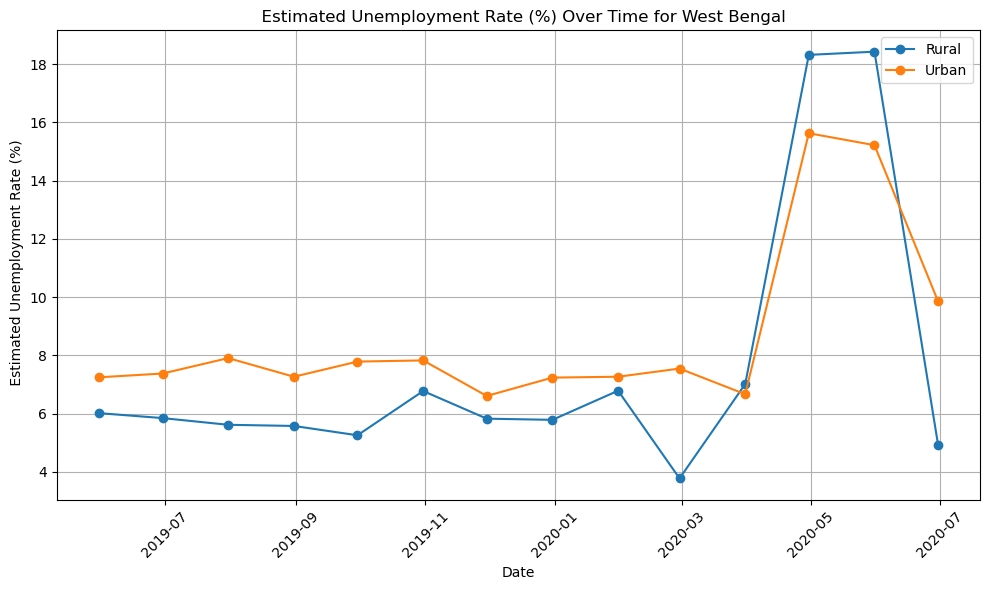

In [60]:
grouped_df= df.groupby('Region')
def change_in_employed(rate_col):
    df[' Date'] = pd.to_datetime(df[' Date'])
    for column,column_data in grouped_df:
        rural_data = column_data[column_data['Area'] == "Rural"]
        urban_data = column_data[column_data['Area'] == "Urban"]
        column_data.sort_values(by=' Date', inplace=True)
        plt.figure(figsize=(10, 6))
        plt.plot(rural_data[' Date'], rural_data[rate_col], marker='o', linestyle='-', label='Rural')
        plt.plot(urban_data[' Date'], urban_data[rate_col], marker='o', linestyle='-', label='Urban')
        plt.title(f' {rate_col} Over Time for {column}')
        plt.xlabel('Date')
        plt.ylabel(rate_col)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()
change_in_employed(" Estimated Employed") , 
change_in_employed(" Estimated Unemployment Rate (%)")     

### Observation 
#### Chandigarh does not have a Urban region 
#### There has been zero to litlle increase in number of people Employed In rural areas of Assam, Himachalah Pradesh, Uttar Pradesh, Telangana and West Bengal and little to none in Urban areas of Delhi
#### There has been fall in estimated number of people employed in almost all cities in may whch in turn causes an increase in Unemployment rate in may 
#### The great unemployment rate fall in may is most visible in Andhra Pradesh  and some rural parts of Asam ,Bihar and Gujarat

In [61]:
def drawplot(column):
    fig = px.bar(df, x = "Region", y = column, color = "Region", title = column + " by region")
    fig.update_layout(xaxis = {'categoryorder':'total descending'})
    fig.show()
drawplot(" Estimated Unemployment Rate (%)"),
drawplot(" Estimated Employed")

#### Region with highest unemployement rate is Tripura
#### Region with lowest unemployement rate is Sikkim
#### Region with highest people employed is Uttar Pradesh
#### Region with lowest people employed is Sikkim

In [62]:
df[" Estimated Unemployment Rate (%)"].max()

76.74

In [63]:
df[df[" Estimated Unemployment Rate (%)"]==76.74]

Region       Date  Frequency   Estimated Unemployment Rate (%)  \
627  Puducherry 2020-04-30    Monthly                             76.74   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
627              68122.0                                     35.54  Urban

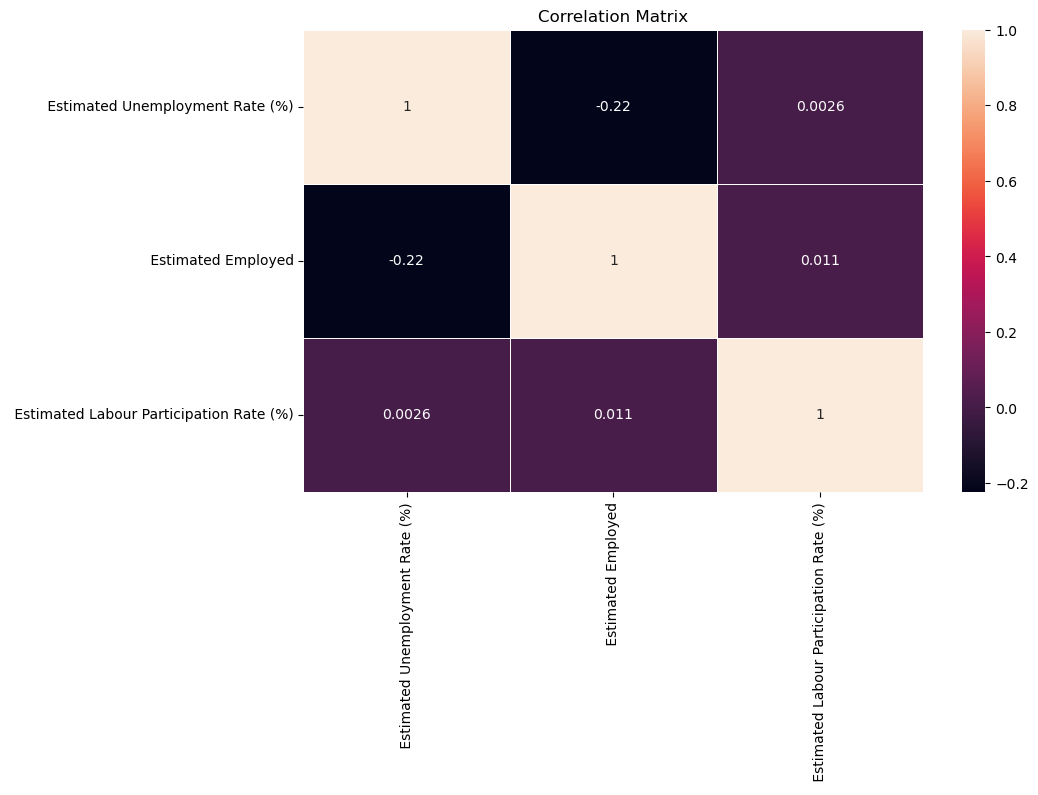

In [65]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

####  It shows that Estimated Unemployment rate increases ,the Estimated employed reduces 
####  It also shows that an increase in people employed causes a little increase in Estimated Labour Participation rate 

In [66]:
def overtime(a,b):
  avg_over_time = df.groupby(a)[b].mean().sort_values(ascending=False).reset_index()
  drawing = avg_over_time.plot(kind="line",x=a,y=b)
  return avg_over_time,drawing

In [67]:
overtime(" Date" ," Estimated Unemployment Rate (%)")


(         Date   Estimated Unemployment Rate (%)
 0  2020-05-31                         24.875294
 1  2020-04-30                         23.641569
 2  2020-06-30                         11.903600
 3  2020-03-31                         10.700577
 4  2020-02-29                          9.964717
 5  2020-01-31                          9.950755
 6  2019-10-31                          9.900909
 7  2019-11-30                          9.868364
 8  2019-08-31                          9.637925
 9  2019-12-31                          9.497358
 10 2019-06-30                          9.303333
 11 2019-09-30                          9.051731
 12 2019-07-31                          9.033889
 13 2019-05-31                          8.874259,
 <Axes: xlabel=' Date'>)

(         Date   Estimated Employed
 0  2019-09-30         7.739464e+06
 1  2020-01-31         7.677344e+06
 2  2020-02-29         7.603996e+06
 3  2019-08-31         7.539815e+06
 4  2020-03-31         7.516581e+06
 5  2019-05-31         7.410148e+06
 6  2019-07-31         7.404425e+06
 7  2020-06-30         7.387009e+06
 8  2019-12-31         7.377388e+06
 9  2019-06-30         7.358642e+06
 10 2019-10-31         7.298382e+06
 11 2019-11-30         7.273661e+06
 12 2020-05-31         5.879363e+06
 13 2020-04-30         5.283320e+06,
 <Axes: xlabel=' Date'>)

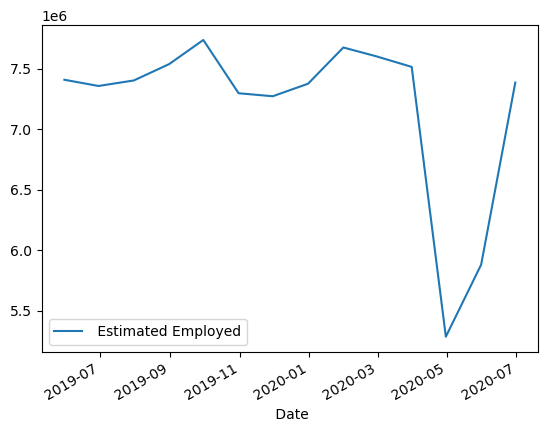

In [23]:
overtime(" Date"," Estimated Employed")

In [ ]:
overtime("Region"," Estimated Unemployment Rate (%)")

In [24]:
def at_time(a,b):
     avg_over_time = df.groupby(a)[b].mean().sort_values(ascending=True).reset_index()
     drawing = avg_over_time.plot(kind="bar",x=a,y=b)  
     return avg_over_time,drawing

(              Region   Estimated Unemployment Rate (%)
 0          Meghalaya                          4.798889
 1             Odisha                          5.657857
 2              Assam                          6.428077
 3        Uttarakhand                          6.582963
 4            Gujarat                          6.663929
 5          Karnataka                          6.676071
 6             Sikkim                          7.249412
 7     Madhya Pradesh                          7.406429
 8     Andhra Pradesh                          7.477143
 9        Maharashtra                          7.557500
 10         Telangana                          7.737857
 11       West Bengal                          8.124643
 12      Chhattisgarh                          9.240357
 13               Goa                          9.274167
 14        Tamil Nadu                          9.284286
 15            Kerala                         10.123929
 16        Puducherry                         10

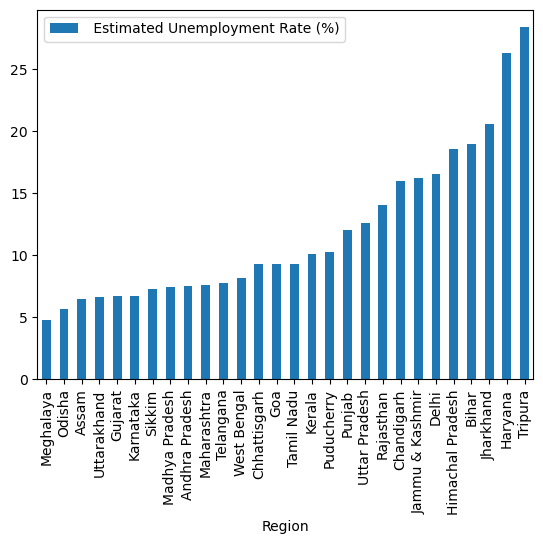

In [25]:
at_time("Region"," Estimated Unemployment Rate (%)")

(              Region   Estimated Employed
 0             Sikkim         1.068807e+05
 1         Puducherry         2.122781e+05
 2                Goa         2.263083e+05
 3         Chandigarh         3.168312e+05
 4          Meghalaya         6.897368e+05
 5            Tripura         7.170026e+05
 6   Himachal Pradesh         1.059824e+06
 7        Uttarakhand         1.390228e+06
 8    Jammu & Kashmir         1.799932e+06
 9              Delhi         2.627513e+06
 10           Haryana         3.557072e+06
 11      Chhattisgarh         4.303499e+06
 12            Kerala         4.425900e+06
 13         Jharkhand         4.469240e+06
 14            Punjab         4.539362e+06
 15             Assam         5.354772e+06
 16            Odisha         6.545747e+06
 17         Telangana         7.939663e+06
 18    Andhra Pradesh         8.154093e+06
 19         Rajasthan         1.004106e+07
 20         Karnataka         1.066712e+07
 21    Madhya Pradesh         1.111548e+07
 22        

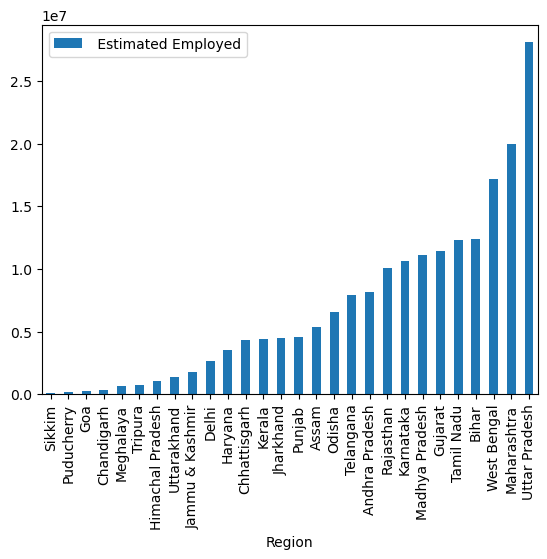

In [26]:
at_time("Region"," Estimated Employed")

(    Area   Estimated Employed
 0  Urban         4.388626e+06
 1  Rural         1.019285e+07,
 <Axes: xlabel='Area'>)

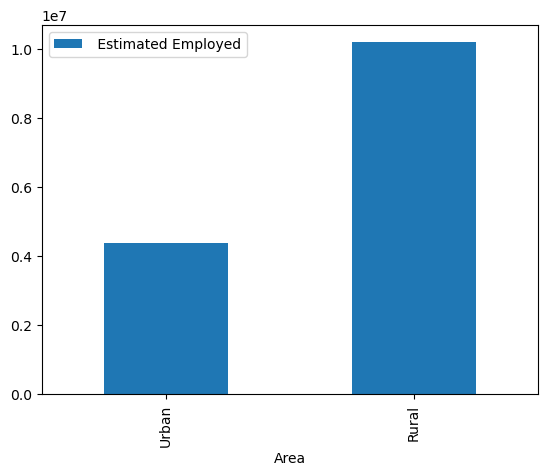

In [27]:
at_time("Area"," Estimated Employed")

### Data Preparation

In [112]:
X = df.drop(' Estimated Unemployment Rate (%)', axis=1)
y = df[' Estimated Unemployment Rate (%)']

### Training Dataset

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Model Evaluation

In [115]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [116]:
print("Training MSE:", mean_squared_error(y_train, train_preds))
print("Testing MSE:", mean_squared_error(y_test, test_preds))
print("Training R^2:", r2_score(y_train, train_preds))
print("Testing R^2:", r2_score(y_test, test_preds))

Training MSE: 101.70159014287688
Testing MSE: 139.07514553297295
Training R^2: 0.052121713234500655
Testing R^2: 0.03938840314253944


In [128]:
train_preds

array([12.29043297, 11.86677177, 11.22964992, 14.1507366 , 11.7514034 ,
       13.72385537,  6.9971128 , 14.12449087,  6.89670342, 13.94480024,
       11.78568373, 14.12924652, 10.51412055, 13.09810151, 13.76084692,
        6.51641414, 14.14441764, 12.70028155, 11.63120606,  9.48707105,
       12.97866161, 13.05498807, 13.11418186, 14.6988639 , 12.02968176,
       13.38395374,  9.74859352, 13.77140501, 10.91318118, 10.59423547,
        6.79295774, 11.79848804, 11.48171212, 11.33512163,  6.58232275,
       14.48352432, 11.52607233,  1.25584052, 11.66898618, 13.45116682,
       10.23389777, 11.86516358, 13.82796558, 13.10213715, 13.30519392,
       13.33523323, 13.70312172, 14.38337867, 11.68375914, 12.83247608,
       11.78859906, 11.13172275, 12.28878896, 11.83841351, 12.83725771,
       13.25487816, 10.31477482, 13.62742037,  0.842815  , 12.3408372 ,
        7.16340109, 13.57086191, 10.41524775, 11.60413012, 13.44368336,
        8.91152667, 13.65298389, 14.06399647, 13.41585666, 12.24

In [130]:
test_preds

array([13.40546448, 13.39938348, 13.0813054 ,  7.04162603, 13.43778361,
       11.80870511, 13.54871951, 14.71767495, 12.20858296, 13.0689411 ,
       14.64357319, 14.63536053, 10.78857195, 13.45260701, 11.73392321,
       12.31936607, 10.38510335, 13.59787448, 12.77540765,  7.66526511,
       13.60938377,  9.46849402, 12.28574442, 14.84526525, 11.04265175,
       13.57595508, 14.72854841, 12.79234813, 13.71514621, 14.41542   ,
       13.57763173, 12.31221096, 11.49099806, 10.2596589 , 13.97714392,
       13.52638922, 10.23065969,  9.4081789 ,  9.71653087,  6.98984132,
       12.44104927,  6.82239299, 10.77445028, 11.06849306,  9.90751123,
       13.03857681, 14.38633877, 10.5104249 , 13.00564269, 13.33734634,
       13.27892071, 12.17605118, 10.16526254, 12.82470221, 13.95454714,
       13.84887388,  9.92562588, 14.49294147,  9.79058054, 13.47965818,
       14.50136958, 12.99064087, 13.83338397, 14.80863963, 11.22215846,
       13.0997427 , 13.7908359 ,  9.67456406, 12.32482684, 14.51